In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from matplotlib import pyplot as plt

%matplotlib inline

In [19]:
df = pd.read_csv('Expanded_data_with_more_features.csv', index_col=0)

In [20]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


C:\Users\lolta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


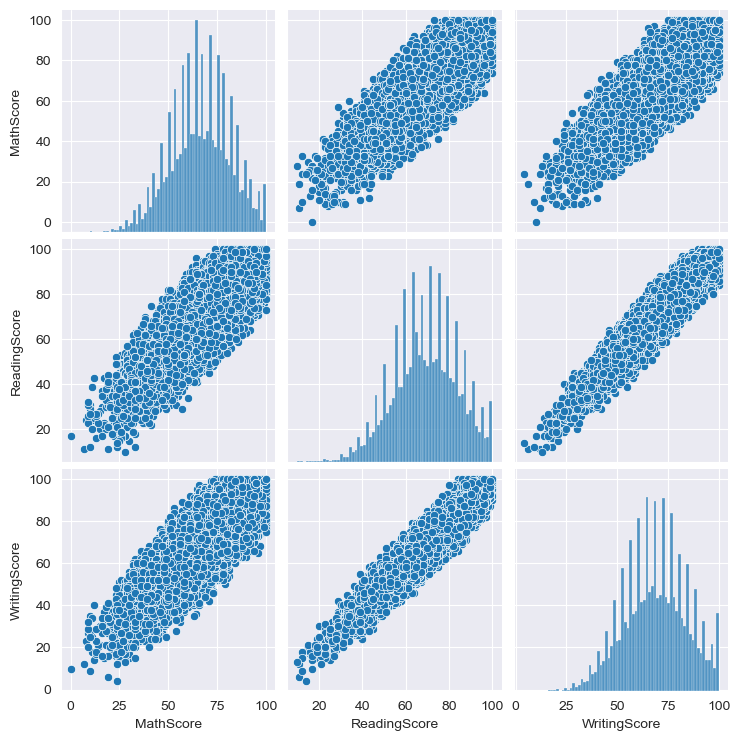

In [21]:
sns.pairplot(df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']])

In [22]:
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].corr()

,MathScore,ReadingScore,WritingScore
MathScore,1.000000,0.817825,0.807118
ReadingScore,0.817825,1.000000,0.952584
WritingScore,0.807118,0.952584,1.000000


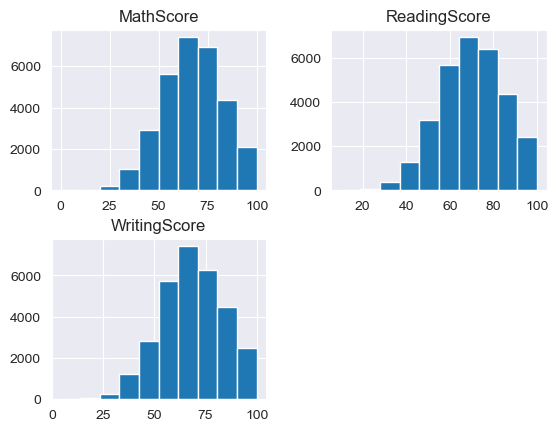

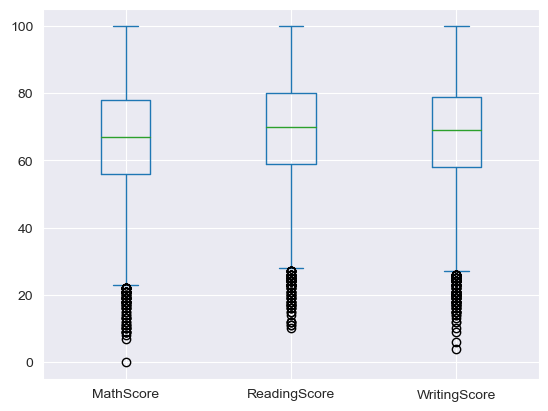

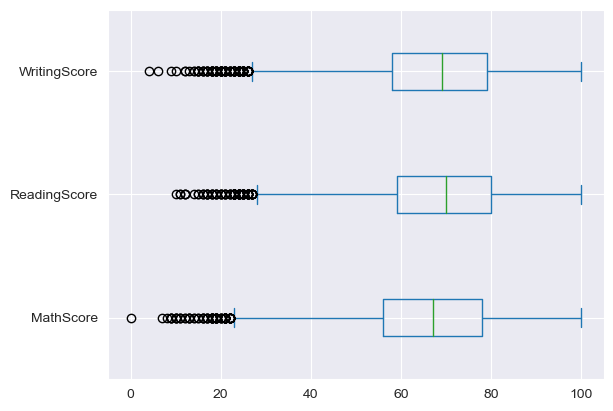

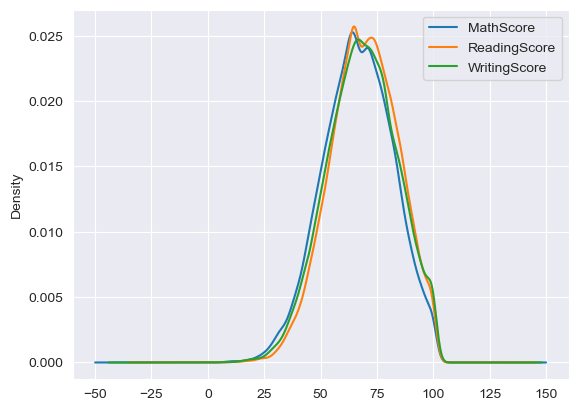

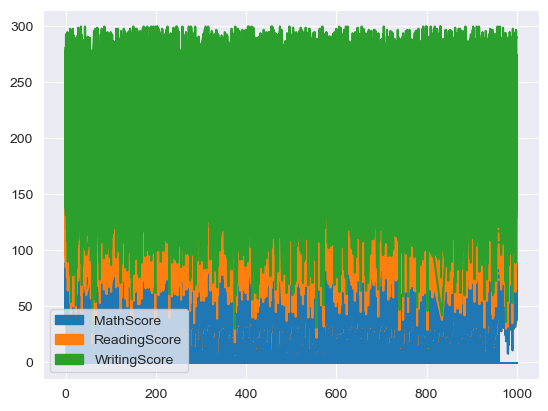

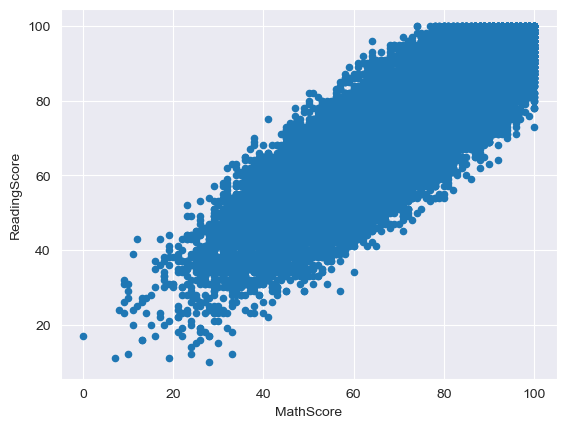

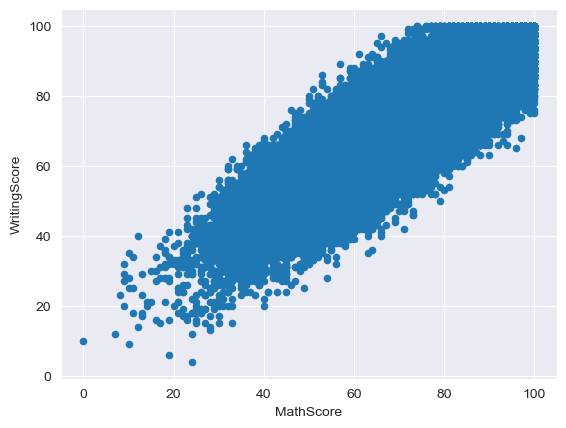

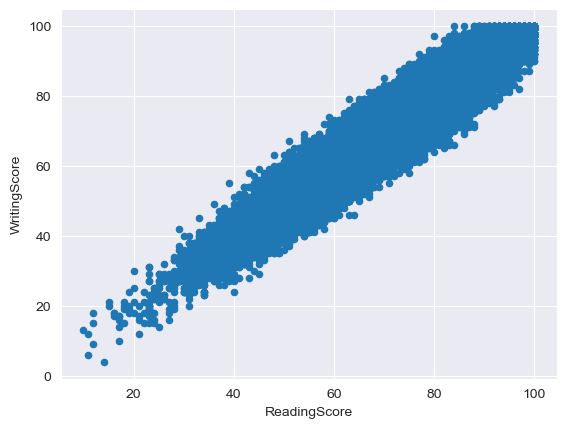

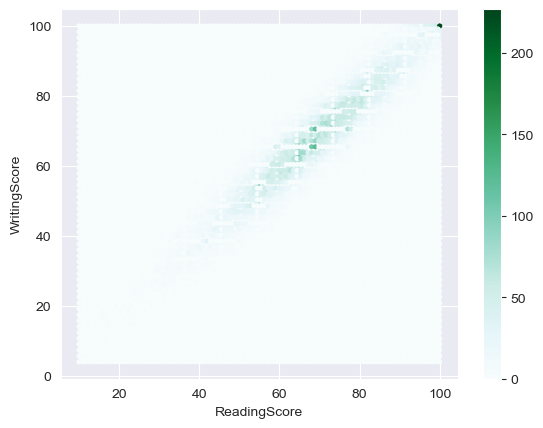

In [24]:
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].describe()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].hist()
plt.show()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='box')
plt.show()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='box', vert=False)
plt.show()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='kde')
plt.show()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='area')
plt.show()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='scatter', x='MathScore', y='ReadingScore')
plt.show()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='scatter', x='MathScore', y='WritingScore')
plt.show()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='scatter', x='ReadingScore', y='WritingScore')
plt.show()
df.loc[:, ['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='hexbin', x='ReadingScore', y='WritingScore')
plt.show()

<Axes: xlabel='ParentMaritalStatus'>

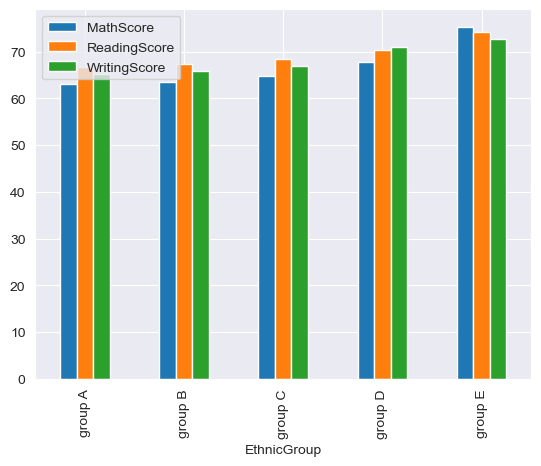

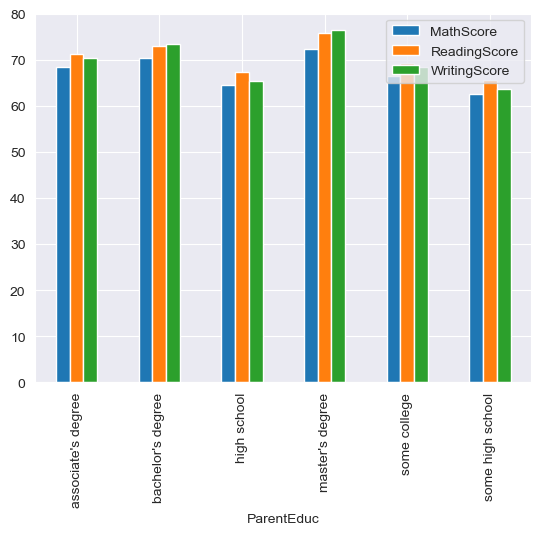

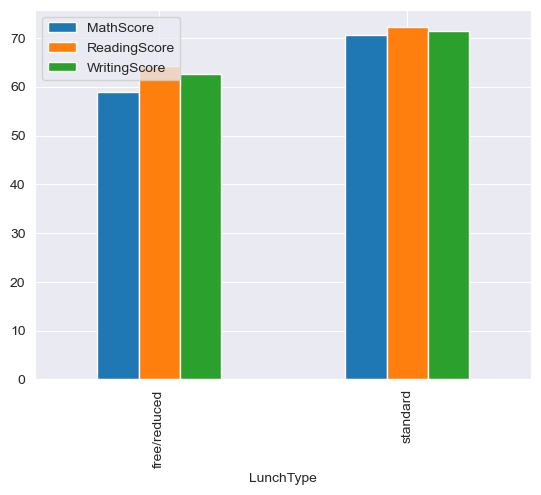

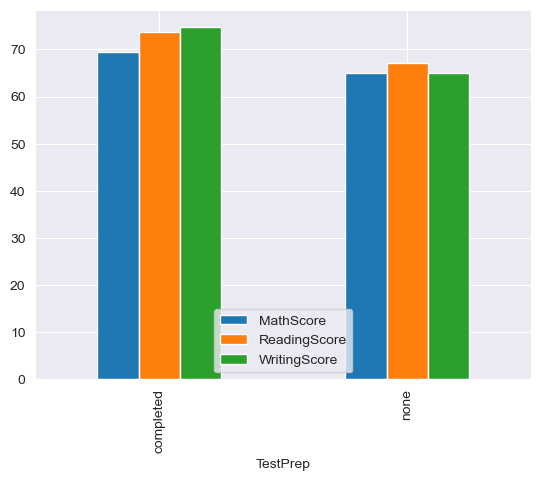

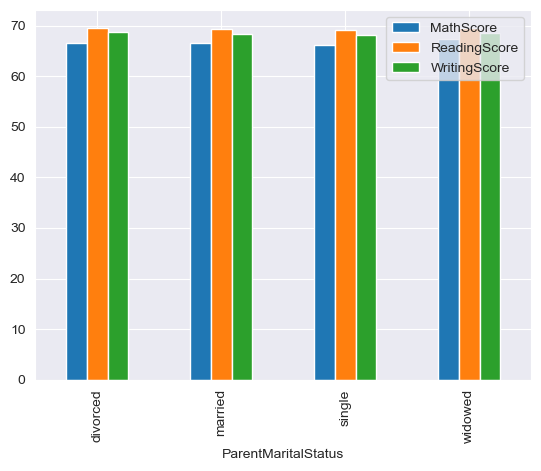

In [30]:
group_by_EthnicGroup = df.groupby('EthnicGroup').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_EthnicGroup.plot(kind='bar')
group_by_ParentEduc = df.groupby('ParentEduc').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_ParentEduc.plot(kind='bar')
group_by_Lunch = df.groupby('LunchType').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_Lunch.plot(kind='bar')
group_by_TestPrep = df.groupby('TestPrep').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_TestPrep.plot(kind='bar')
group_by_ParentMaritalStatus = df.groupby('ParentMaritalStatus').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
group_by_ParentMaritalStatus.plot(kind='bar')

In [47]:
processed_df = df.copy()
processed_df.ParentEduc = processed_df.apply(lambda row: 1 if row.ParentEduc == 'some high school' else 2 if row.ParentEduc == 'high school' else 3 if row.ParentEduc == 'some college' else 4 if row.ParentEduc == 'associate\'s degree' else 5 if row.ParentEduc == 'bachelor\'s degree' else 6, axis=1)
processed_df.LunchType = processed_df.apply(lambda row: 1 if row.LunchType == 'free/reduced' else 2, axis=1)
processed_df.TestPrep = processed_df.apply(lambda row: 1 if row.TestPrep == 'none' else 2, axis=1)
# processed_df.ParentMaritalStatus = processed_df.apply(lambda row: 1 if row.ParentMaritalStatus == 'single' else 2 if row.ParentMaritalStatus == '', axis=1)
processed_df.EthnicGroup = processed_df.apply(lambda row: 1 if row.EthnicGroup == 'group A' else 2 if row.EthnicGroup == 'group B' else 3 if row.EthnicGroup == 'group C' else 4 if row.EthnicGroup == 'group D' else 5 if row.EthnicGroup == 'group E' else 6, axis=1)

processed_df.WklyStudyHours = processed_df.apply(lambda row: 1 if row.WklyStudyHours == '< 5' else 2 if row.WklyStudyHours == '5 - 10' else 3, axis=1)

processed_df = processed_df.drop(['ParentMaritalStatus'], axis=1)

In [48]:
processed_df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,6,5,2,1,regularly,yes,3.0,school_bus,1,71,71,74
1,female,3,3,2,2,sometimes,yes,0.0,NaN,2,69,90,88
2,female,2,6,2,1,sometimes,yes,4.0,school_bus,1,87,93,91
3,male,1,4,1,1,never,no,1.0,NaN,2,45,56,42
4,male,3,3,2,1,sometimes,yes,0.0,school_bus,2,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,female,4,2,2,1,sometimes,no,2.0,school_bus,2,59,61,65
890,male,5,2,2,1,regularly,no,1.0,private,2,58,53,51
911,female,6,2,1,2,sometimes,no,1.0,private,2,61,70,67
934,female,4,4,2,2,regularly,no,3.0,school_bus,2,82,90,93


In [52]:
X_train = processed_df[['EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'WklyStudyHours']].values
y_train = processed_df[['MathScore', 'ReadingScore', 'WritingScore']].values

K = 3 # Количество соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_new = np.array(processed_df.loc[0, ['EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'WklyStudyHours']])
# Получение ответа для нового объекта
target = knn.predict(X_new)
print(target)


[[53 59 56]
 [53 58 59]
 [48 55 52]
 [48 50 46]
 [51 52 53]
 [40 58 56]
 [72 76 77]
 [55 59 63]
 [18 32 28]
 [60 67 78]
 [77 64 64]
 [46 62 65]
 [57 62 73]
 [68 66 58]
 [59 76 76]
 [53 47 45]
 [66 76 77]
 [36 39 38]
 [69 58 53]
 [76 64 67]
 [59 66 67]
 [46 62 65]
 [52 59 49]
 [48 46 43]
 [63 74 78]
 [59 58 59]
 [76 58 64]
 [74 73 72]
 [69 79 78]
 [48 43 41]
 [46 42 47]]


In [2]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    processed_df[
    ['EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'WklyStudyHours']], 
    processed_df['MathScore'], 
    test_size=0.3, 
    random_state=17)

K = 10000# Количество соседей
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy:', accur)


NameError: name 'processed_df' is not defined